# Extracting data from supercomputer

In [1]:
import numpy as np

Lx = 120
Ly = 8
U = 1
gamma = 15


val_up = np.loadtxt('data/eig_val_up_clean_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')
vec_up = np.loadtxt('data/eig_vec_up_clean_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')

val_dn = np.loadtxt('data/eig_val_dn_clean_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')
vec_dn = np.loadtxt('data/eig_vec_dn_clean_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')


# val_up = np.loadtxt('data/eig_val_up_clean_dope30_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')
# vec_up = np.loadtxt('data/eig_vec_up_clean_dope30_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')

# val_dn = np.loadtxt('data/eig_val_dn_clean_dope30_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')
# vec_dn = np.loadtxt('data/eig_vec_dn_clean_dope30_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')



In [13]:
########## Replace norm by sum
def prob_density(vector_solution, order, Lx, Ly):
    density = np.power(vector_solution[:, order], 2)
    density = density/np.sum(density)
    return np.matrix.flatten(density).tolist()


listA = []
listB = []
list_overlap = []
# vec = np.matrix(vec)
dope = 0

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if yi % 2 == 0:
        listA.append(i)
    else:
        listB.append(i)

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if Ly/2 -1 <= yi <= Ly/2:
        list_overlap.append(i)

        
        
####### Compute charge on sites A and B here
print("=============x=============")

for i in range(30, 70):
    ORDER_up = i
    ORDER_dn = i


    density_up = prob_density(vec_up, ORDER_up, Lx, Ly)
    qa_up = np.sum(np.take(prob_density(vec_up, ORDER_up, Lx, Ly), listA))
    energy_up = val_up[ORDER_up]

    density_dn = prob_density(vec_dn, ORDER_dn, Lx, Ly)
    qa_dn = np.sum(np.take(prob_density(vec_dn, ORDER_dn, Lx, Ly), listA))
    energy_dn = val_dn[ORDER_dn]

    print("Energy spin up with order " + str(ORDER_up) + ": ", energy_up)
    print(qa_up)


    print("Energy spin dn with order " + str(ORDER_dn) + ": ", energy_dn)
    print(qa_dn)

ORDER_up = 48
ORDER_dn = 31


density_up = prob_density(vec_up, ORDER_up, Lx, Ly)
qa_up = np.sum(np.take(prob_density(vec_up, ORDER_up, Lx, Ly), listA))
energy_up = val_up[ORDER_up]

density_dn = prob_density(vec_dn, ORDER_dn, Lx, Ly)
qa_dn = np.sum(np.take(prob_density(vec_dn, ORDER_dn, Lx, Ly), listA))
energy_dn = val_dn[ORDER_dn]

print("Energy spin up with order " + str(ORDER_up) + ": ", energy_up)
print(qa_up)


print("Energy spin dn with order " + str(ORDER_dn) + ": ", energy_dn)
print(qa_dn)


=============x=============
Energy spin up with order 30:  -0.10696516535087451
0.5063574498481304
Energy spin dn with order 30:  -0.10674138879634468
0.511528375448194
Energy spin up with order 31:  -0.10399950813272667
0.6496951591845457
Energy spin dn with order 31:  -0.1046533529967957
0.504708134800166
Energy spin up with order 32:  -0.09909835746201219
0.42593906506581153
Energy spin dn with order 32:  -0.09770792517888907
0.9415036040163424
Energy spin up with order 33:  -0.0977345169674405
0.939642547738683
Energy spin dn with order 33:  -0.08987750872714147
0.5225394196866623
Energy spin up with order 34:  -0.09229209528191891
0.8739116648636273
Energy spin dn with order 34:  -0.0895607479159682
0.44352466830859305
Energy spin up with order 35:  -0.08998472330155585
0.807612041922014
Energy spin dn with order 35:  -0.08737303489758924
0.4753996821760962
Energy spin up with order 36:  -0.08697090285456625
0.27158906036220803
Energy spin dn with order 36:  -0.08591757484631236
0

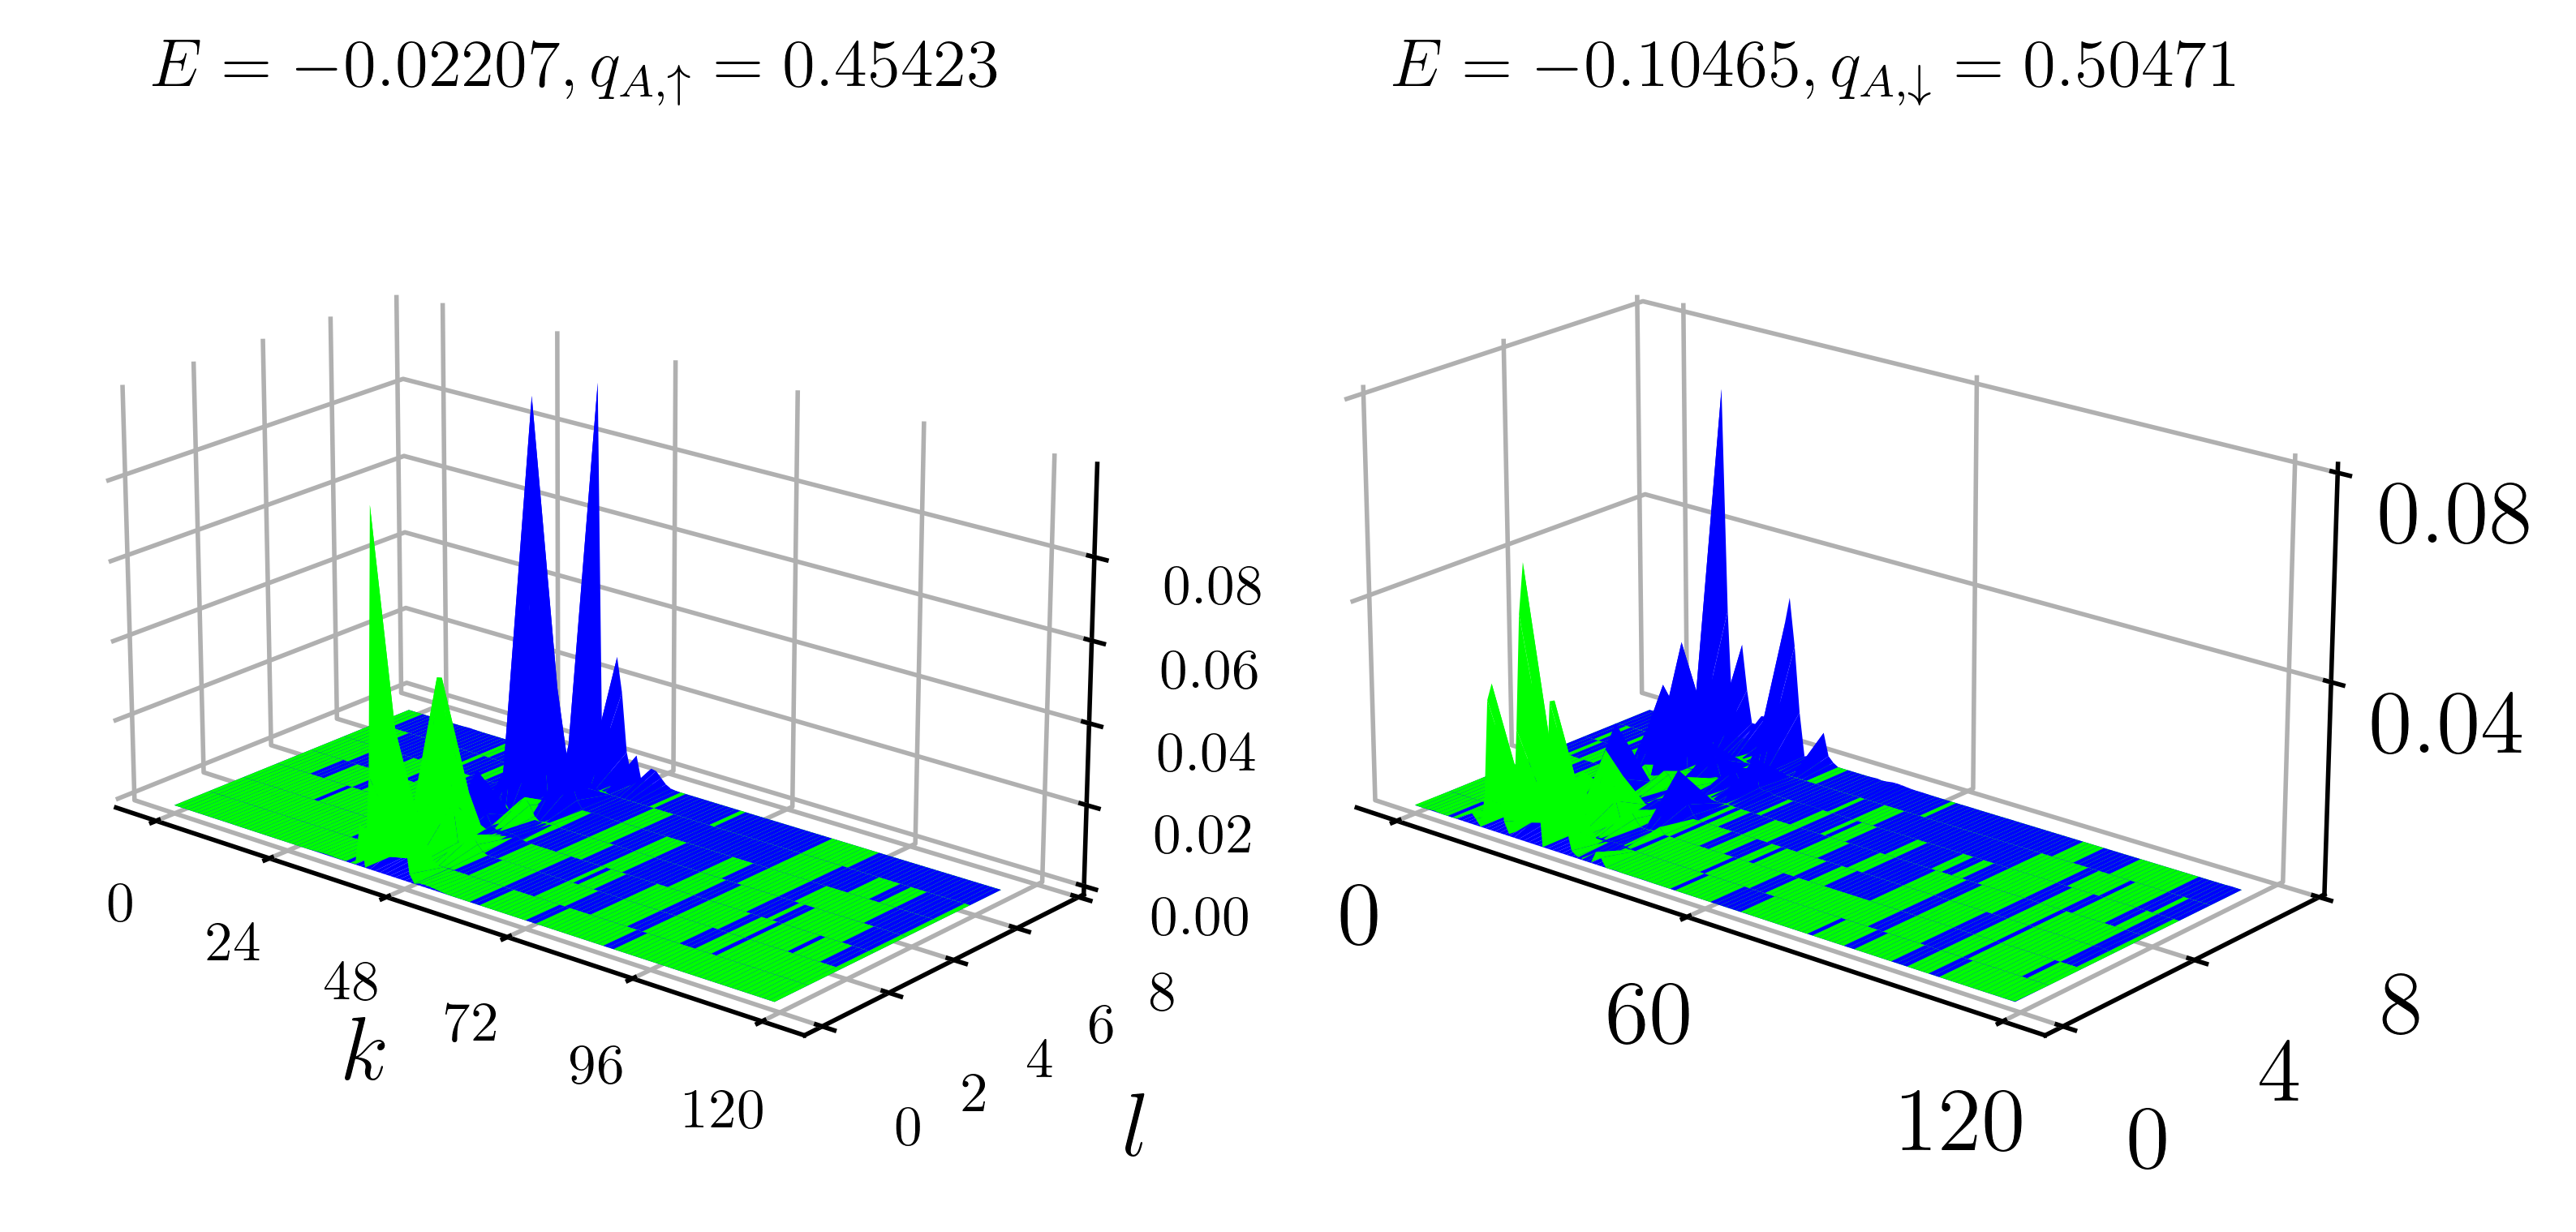

In [14]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

plt.rcParams.update({'text.usetex': True})


fig = plt.figure(dpi=500)
ax = fig.add_subplot(1,2,1, projection="3d")
ax1 = fig.add_subplot(1,2,2, projection="3d")


listA = []
listB = []
list_overlap = []


for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if yi % 2 == 0:
        listA.append(i)
    else:
        listB.append(i)

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if Ly/2 -1 <= yi <= Ly/2:
        list_overlap.append(i)




# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=10, hspace=None)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel("$k$", fontsize=16)
ax.set_ylabel("$l$", fontsize=16)
ax.zaxis.set_rotate_label(False) 
# ax.set_zlabel("$| \psi |^2$", fontsize=16, rotation=0)
ax.set_box_aspect((2,1,1))
ax.grid([1])


ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax1.set_xlabel("$k$", fontsize=16)
# ax1.set_ylabel("$l$", fontsize=16)
ax1.zaxis.set_rotate_label(False) 
# ax1.set_zlabel("$| \psi |^2$", fontsize=16, rotation=0)
ax1.set_box_aspect((2,1,1))




colors = [
    '#0504aa',  # blue royal
    '#01ff07',  # green light
]



# Make data.
X = np.arange(Lx)
Y = np.arange(Ly)
X, Y = np.meshgrid(X, Y)


    
### For fractional charges, we plot A sites and B sites separately
### where A and B sites differ in Ly


prob_A_up = []
prob_B_up = []
for site_index, element in enumerate(density_up):
    yi = Ly - (site_index // Lx + 1) + 1
    if yi % 2 == 0:
        prob_A_up.append(0)
        prob_B_up.append(element)
    else:
        prob_A_up.append(element)
        prob_B_up.append(0)

prob_A_dn = []
prob_B_dn = []
for site_index, element in enumerate(density_dn):
    yi = Ly - (site_index // Lx + 1) + 1
    if yi % 2 == 0:
        prob_A_dn.append(0)
        prob_B_dn.append(element)
    else:
        prob_A_dn.append(element)
        prob_B_dn.append(0) 




col1 = np.full(np.reshape(prob_A_dn, (Ly, Lx)).shape, 'blue')
col1[Ly-1, :] = np.full(Lx, 'none')
col2 = np.full(np.reshape(prob_B_dn, (Ly, Lx)).shape, 'lime')
col2[Ly-1, :] = np.full(Lx, 'none')

ax.plot_surface(np.append(X, X, axis=0),
                np.append(Y, Y, axis=0),
                np.append(np.reshape(prob_A_up, (Ly, Lx)), 
                          np.reshape(prob_B_up, (Ly, Lx)), axis=0),
                  facecolors= np.append(col1, col2, axis=0),
                 antialiased=True, edgecolors='k', linewidth=0, rstride=1, cstride=1,
                zorder=1, shade=False)



col1 = np.full(np.reshape(prob_A_up, (Ly, Lx)).shape, 'blue')
col1[Ly-1, :] = np.full(Lx, 'none')
col2 = np.full(np.reshape(prob_B_up, (Ly, Lx)).shape, 'lime')
col2[Ly-1, :] = np.full(Lx, 'none')

ax1.plot_surface(np.append(X, X, axis=0),
                np.append(Y, Y, axis=0),
                np.append(np.reshape(prob_A_dn, (Ly, Lx)), 
                          np.reshape(prob_B_dn, (Ly, Lx)), axis=0),
                  facecolors= np.append(col1, col2, axis=0),
                 antialiased=True, edgecolors='w', linewidth=0, rstride=1, cstride=1,
                zorder=1, shade=False)



ax.set_xticks(np.arange(0, Lx+1, Lx//5))
ax1.set_xticks(np.arange(0, Lx+1, Lx//2))

ax.set_yticks(np.arange(0, Ly+1, Ly//4))
ax1.set_yticks(np.arange(0, Ly+1, Ly//2))

ax1.set_zticks([0.04, 0.08])

ax.view_init(elev=20., azim=-50)
ax1.view_init(elev=20., azim=-50)

ax1.tick_params(axis='both', which='major', labelsize=16)

ax.set_title(r"$E = %1.5f, q_{A, \uparrow} = %1.5f $" 
             % tuple((energy_up, qa_up)))

ax1.set_title(r"$E = %1.5f, q_{A, \downarrow} = %1.5f $" 
             % tuple((energy_dn, qa_dn)))

# ax.grid(False)
# ax1.grid(False)


# fig.tight_layout(rect=[0.1, 0.2, 1, 1.1])
fig.tight_layout(w_pad=3)



# plt.savefig("prob_density_dope5_U5_G01.png")

/var/folders/8c/yvgv5fnx2nb77hcl4bw6dtzr0000gn/T/ipykernel_31955/415542757.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(dpi=100)


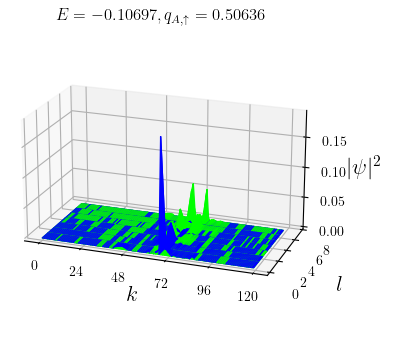

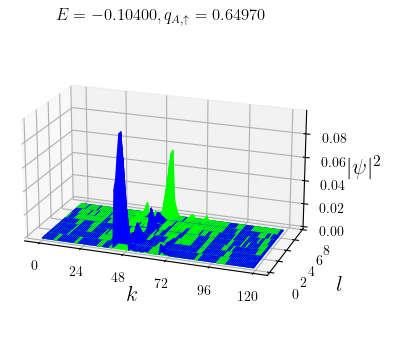

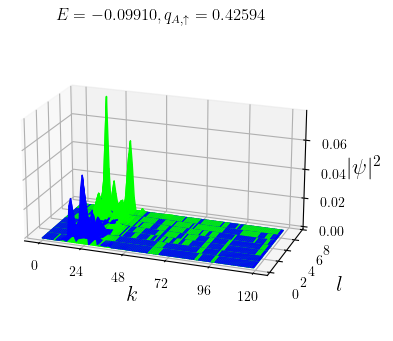

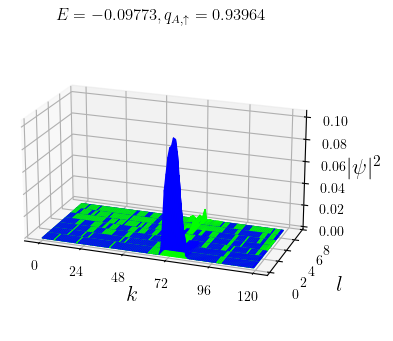

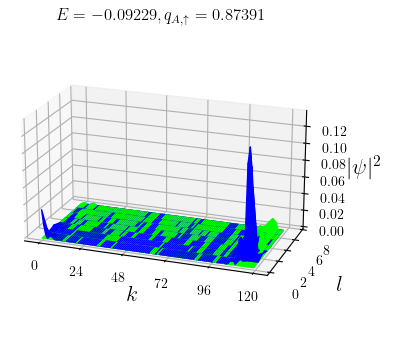

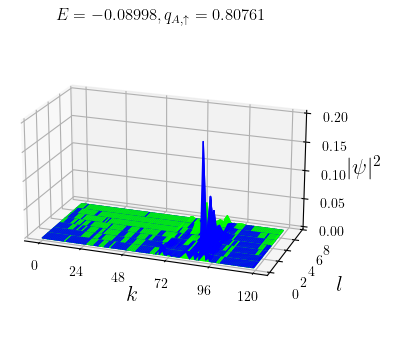

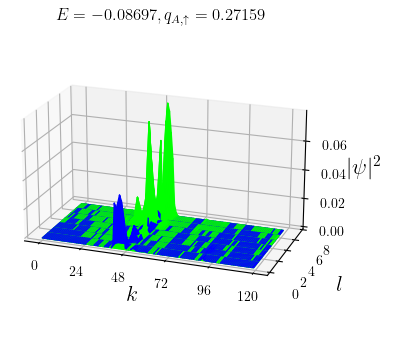

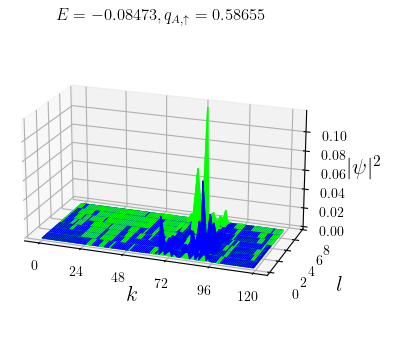

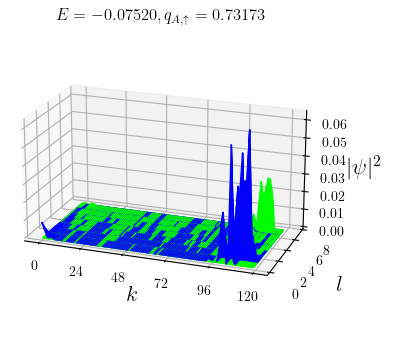

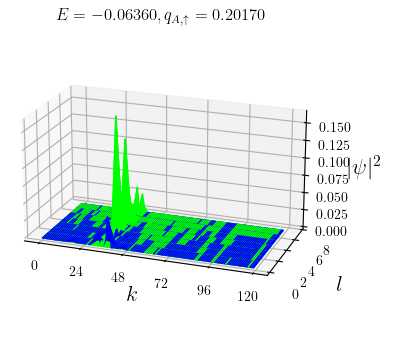

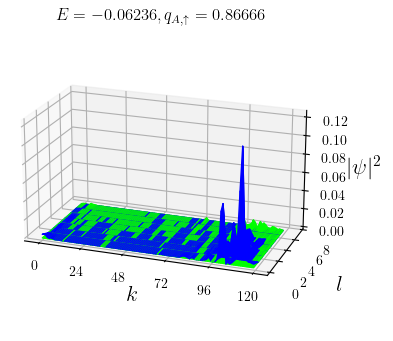

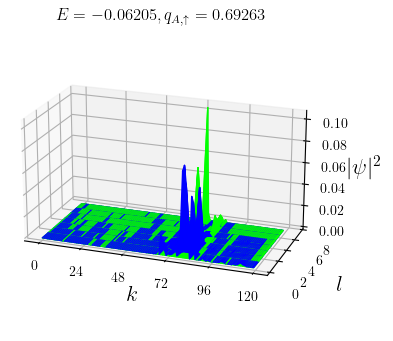

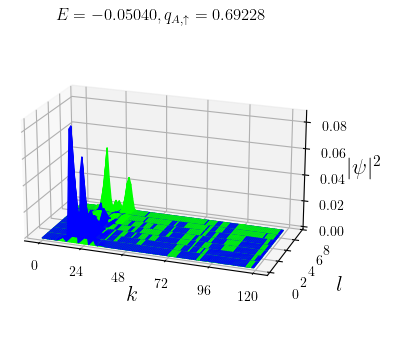

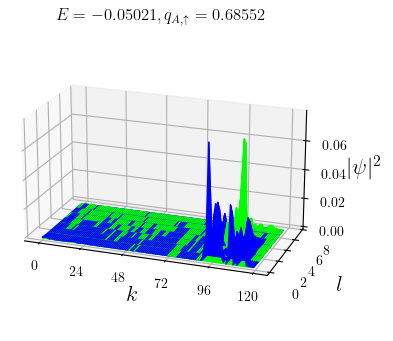

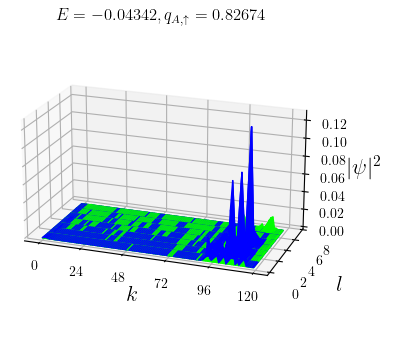

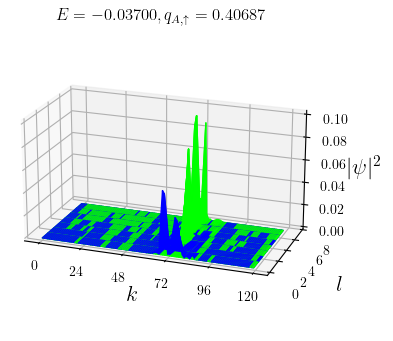

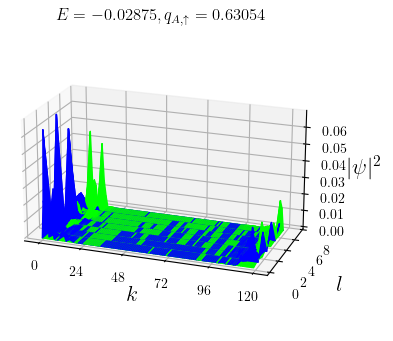

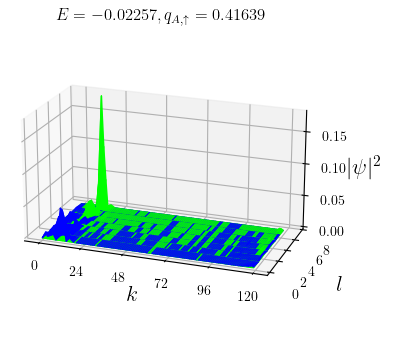

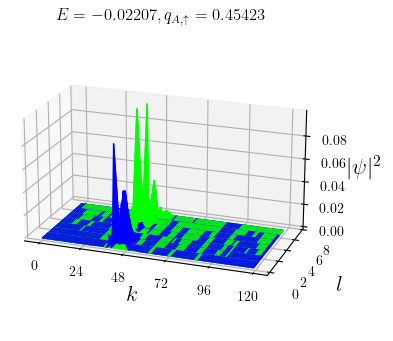

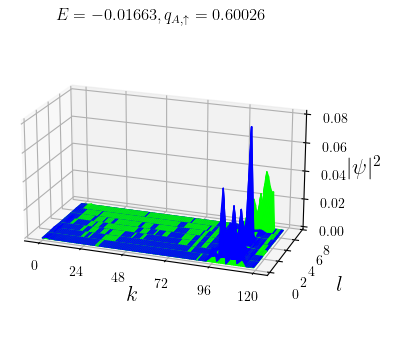

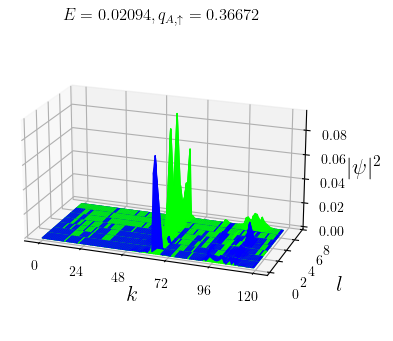

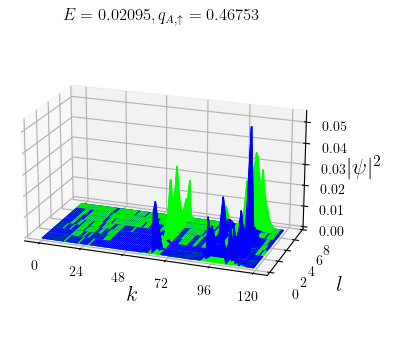

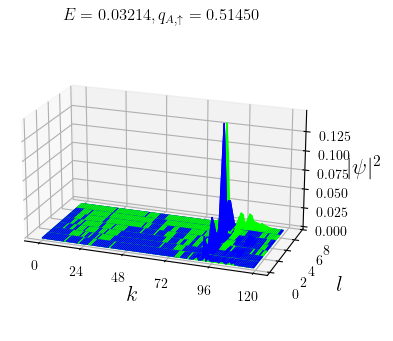

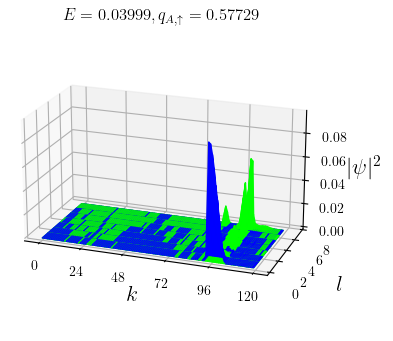

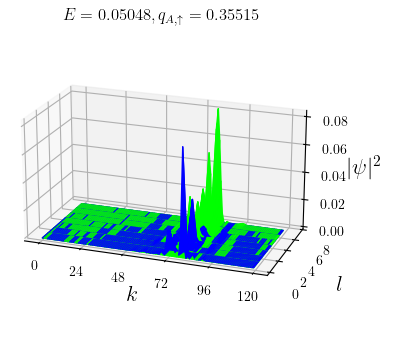

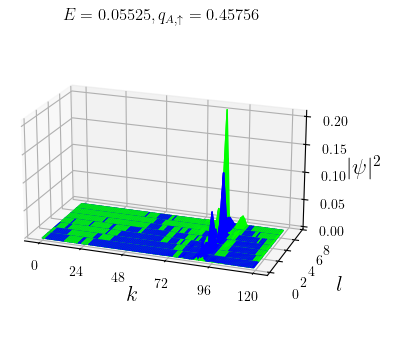

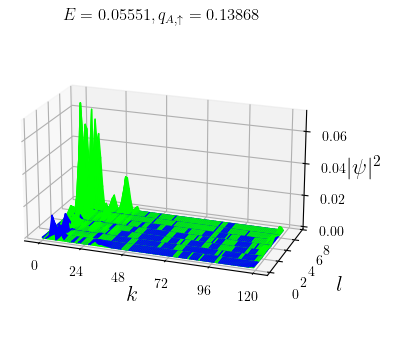

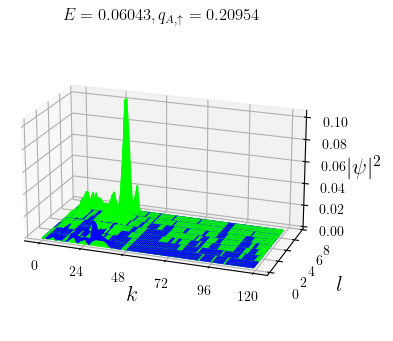

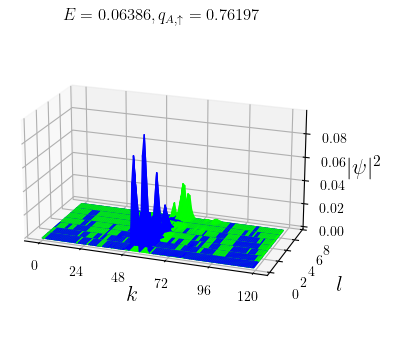

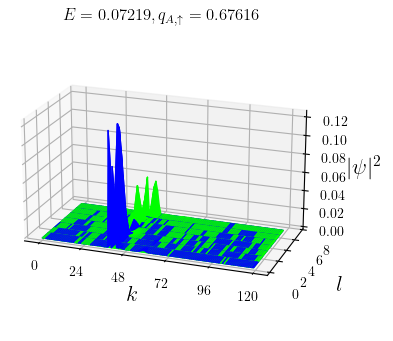

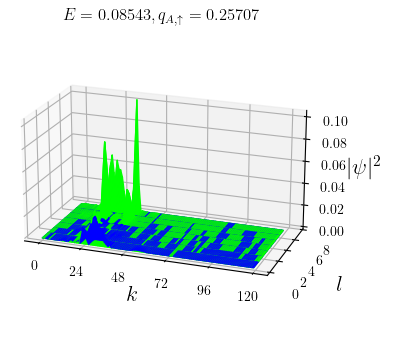

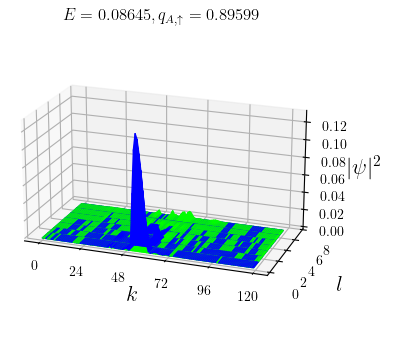

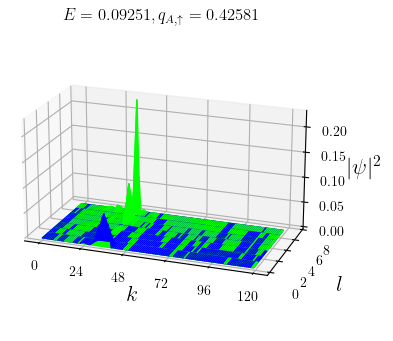

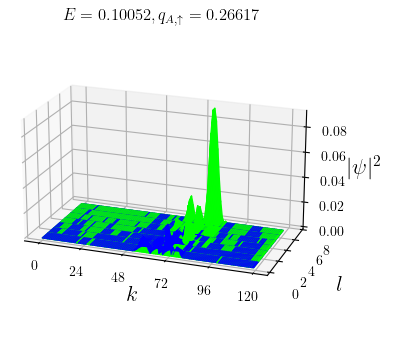

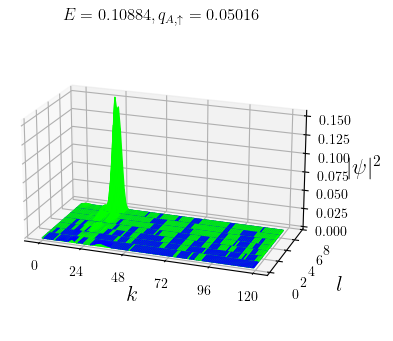

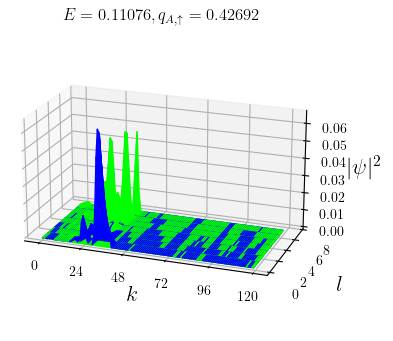

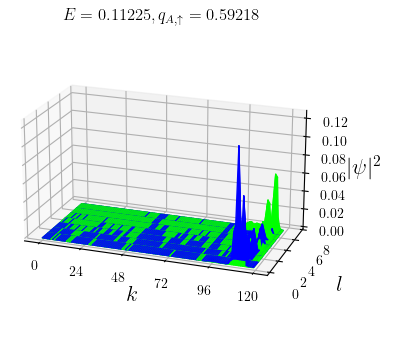

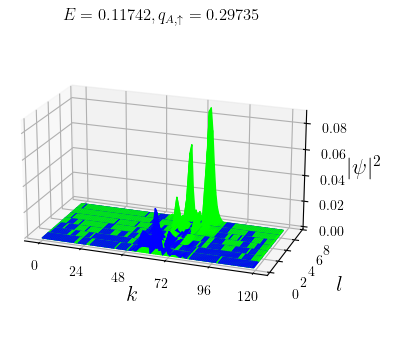

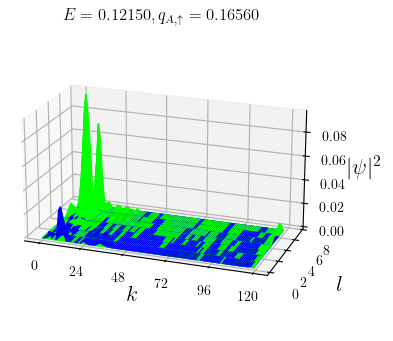

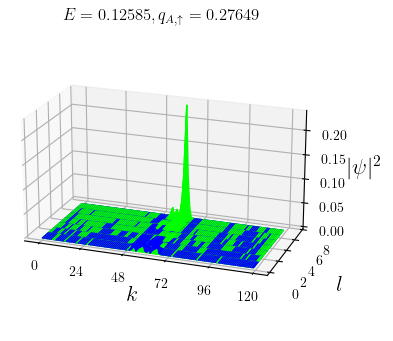

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

plt.rcParams.update({'text.usetex': True})

# fig = plt.figure(dpi=300)
# ax = fig.add_subplot(1,1,1, projection="3d")


listA = []
listB = []
list_overlap = []


for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if yi % 2 == 0:
        listA.append(i)
    else:
        listB.append(i)

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if Ly/2 -1 <= yi <= Ly/2:
        list_overlap.append(i)



for ORDER_up in range(30, 70):
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1, projection="3d")
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
    # ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_xlabel("$k$", fontsize=16)
    ax.set_ylabel("$l$", fontsize=16)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel("$| \psi |^2$", fontsize=16, rotation=0)
    ax.set_box_aspect((2,1,1))
    ax.grid([1])
    colors = [
        '#0504aa',  # blue royal
        '#01ff07',  # green light
    ]
    # Make data.
    X = np.arange(Lx)
    Y = np.arange(Ly)
    X, Y = np.meshgrid(X, Y)
    # For fractional charges, we plot A sites and B sites separately
    # where A and B sites differ in Ly
    ###########
    # ORDER_up = i
    density_up = prob_density(vec_up, ORDER_up, Lx, Ly)
    qa_up = np.sum(np.take(prob_density(vec_up, ORDER_up, Lx, Ly), listA))
    energy_up = val_up[ORDER_up]
    ###########
    prob_A_up = []
    prob_B_up = []
    for site_index, element in enumerate(density_up):
        yi = Ly - (site_index // Lx + 1) + 1
        if yi % 2 == 0:
            prob_A_up.append(0)
            prob_B_up.append(element)
        else:
            prob_A_up.append(element)
            prob_B_up.append(0)

    col1 = np.full(np.reshape(prob_A_dn, (Ly, Lx)).shape, 'lime')
    col1[Ly-1, :] = np.full(Lx, 'none')
    col2 = np.full(np.reshape(prob_B_dn, (Ly, Lx)).shape, 'blue')
    col2[Ly-1, :] = np.full(Lx, 'none')

    ax.plot_surface(np.append(X, X, axis=0),
                    np.append(Y, Y, axis=0),
                    np.append(np.reshape(prob_A_up, (Ly, Lx)), 
                            np.reshape(prob_B_up, (Ly, Lx)), axis=0),
                    facecolors= np.append(col1, col2, axis=0),
                    antialiased=True, edgecolors='k', linewidth=1, rstride=1, cstride=1,
                    zorder=1, shade=False)

    ax.set_xticks(np.arange(0, Lx+1, Lx//5))
    ax.set_yticks(np.arange(0, Ly+1, Ly//4))
    ax.view_init(elev=20., azim=-70)
    ax.set_title(r"$E = %1.5f, q_{A, \uparrow} = %1.5f $" 
                % tuple((energy_up, qa_up)))

    # plt.show()